In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def absorption(T, ν):
    """currently: T in °C"""
    ρL = 1000. # kg/m³
    c = 299792458. # m/s
    
    ν2pi = 2. * np.pi * ν
    ν2pisq = ν2pi * ν2pi
    
    # Static dielectric permittivity
    ϵs = 8.7914e1 - 4.0440e-1 * T + 9.5873e-4 * T*T - 1.3280e-6 * T*T*T
    
    # Relaxation term components
    Δ1 = 8.111e1 * np.exp(-4.434e-3 * T)
    Δ2 = 2.025e0 * np.exp(-1.073e-2 * T)
    τ1 = 1.302e-13 * np.exp(6.627e2/(T + 1.342e2))
    τ2 = 1.012e-14 * np.exp(6.089e2/(T + 1.342e2))
    denom1 = 1 + ν2pisq*τ1*τ1
    denom2 = 1 + ν2pisq*τ2*τ2
    
    # Relaxation terms
    A1 = τ1*τ1*Δ1/denom1
    A2 = τ2*τ2*Δ2/denom2
    B1 = τ1*Δ1/denom1
    B2 = τ2*Δ2/denom2
    
    # Dielectric permittivity
    ϵreal = ϵs - ν2pisq * (A1 + A2)
    ϵimag = ν2pi * (B1 + B2)
    ϵ = ϵreal + 1j * ϵimag
    
    # Mass absorption coefficient
    return 3.*ν2pi/ρL/c * np.imag((ϵ-1)/(ϵ+2))

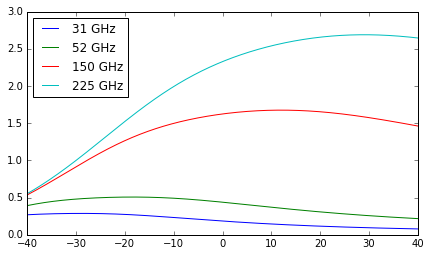

In [6]:
Ts = np.linspace(-40, 40, 500)
plt.figure(figsize=(7, 4))
plt.plot(Ts, absorption(Ts, 31.0e9), label="31 GHz")
plt.plot(Ts, absorption(Ts, 52.0e9), label="52 GHz")
plt.plot(Ts, absorption(Ts, 150.0e9), label="150 GHz")
plt.plot(Ts, absorption(Ts, 225.0e9), label="225 GHz")
plt.legend(loc="upper left");